In [1]:
using LaTeXStrings

# Motion of a carged particle in the field of a magnetic dipole.
## Numerically computing the orbits of electrons in a external dipolar magnetic field configuration.

The reference for this motion is: --Trapped Orbits in a Magnetic Dipole Field--, A. J. Dragt, Review of Geophysics, Vol. 3, Number 2, (1965), and --Global aspects of charged particle motion in axially symmetric multipole magnetic fields--, John V. Shebalin.

The charge particle Lagrangian for a field with azimuthal symmetry is given by:

\begin{equation}
\mathcal{L} = -mc^2\sqrt{\left( 1-v^2/c^2 \right)} + \frac{e}{c}A(r,\theta)r\sin\left( {\theta} \right) v^{\phi},
\end{equation}

where $A$ is the $z$ component of the vector potential. 
Recall that in these coordinates we have, $v^2 = \dot{r}^2 + r^2 \dot{\theta}^2 + r^2\sin^2(\theta) \dot{\phi}^2$.
It is convenient to redefine $A \to A/c$ $m=1$, $e \to e/m$, to get rid of irelevant parameters.

Since the Lagrangian does not depend on time the energy is conserved. For this case, without and electrostatic potential, it is given by:

\begin{equation}
H = \frac{c^2}{ \sqrt{1-v^2/c^2}} = \gamma c^2.
\end{equation}
Thus, the speed is conserved along the motion. On the other hand, the azimuthal symmetry also implies the particle angular momentum is also conserved, 

\begin{equation}
P := \frac{\partial \mathcal{L}}{\partial \dot{\phi}} = \frac{\dot{\phi} r^2 \sin^2{\theta} }{\sqrt{1-v^2/c^2} }+ e A(r,\theta) r \sin{\theta}  = \gamma \dot{\phi} r^2 \sin^2{\theta} + e A(r,\theta) r \sin{\theta}
\end{equation}

In spherical coordinates the complete system of equations becomes:

\begin{align}
    \frac{\partial \phi}{dt} &=& \frac{h}{\gamma r\sin{\theta}} \;\;\;\;\;\;\; ; h = \left[ \frac{P}{r\sin{\theta}} - e A \right] \\
    \frac{\partial \dot{r}}{dt} &=& e \frac{1}{ \gamma}\frac{\partial(rA)}{\partial r} \sin{\theta} \dot{\phi} + \frac{\left( v^2 - \dot{r}^2 \right)}{r} \\
    \frac{\partial \dot{\theta}}{dt} &=& \left[ \frac{e}{\gamma} \frac{1}{r}\frac{\partial(\sin{\theta}A)}{\partial\theta} + \sin{\theta}\cos{\theta} \dot{\phi} \right]\dot{\phi} - 2\frac{\dot{r}}{r}\dot{\theta}
\end{align}

Since the energy conservation implies the conservation of $v^2$, using the expression for the angular momentum we obtain,

\begin{equation}
v^2 = \left[\dot{r}^2 + r^2 \dot{\theta}^2 + r^2 \sin^2{\theta} \dot{\phi}^2\right] \;\;\;\;\;  \left[\dot{r}^2 + r^2 \dot{\theta}^2\right] = \left[v^2 - \frac{h^2}{\gamma^2}\right] .
\end{equation}

Therefore the movement is only possible when $h^2 = \left[\frac{P}{r\sin{\theta}} - e A\right]^2 < v^2\gamma^2$. 

For a generic multipole we have, 
\begin{equation}
A(r,\theta) = \frac{a_n}{r^{n+1}}P^1_n(\cos{\theta}).
\end{equation}


## The dipolar case.

For this case, $P^1_1(\cos{\theta}) = -\sin(\theta)$.

Defining $e a_1 = a_0$, 

\begin{align}
\frac{d \phi}{dt} &=& \frac{h}{\gamma r\sin{\theta}}  \\
\frac{d \dot{r}}{dt} &=&  \frac{1}{\gamma}\frac{a_0}{r^2} \sin^2{\theta} \dot{\phi} + \frac{v^2 - \dot{r}^2}{r} \\
\frac{d \dot{\theta}}{dt} &=& [- \frac{2a_0}{\gamma r^3} +  \dot{\phi}]\dot{\phi}\sin{\theta}\cos{\theta}  - 2\frac{\dot{r}}{r}\dot{\theta} \\
\frac{d \theta}{dt} &=& \dot{\theta} \\
\frac{d r}{dt} &=& \dot{r} \\
\end{align}

Where,
\begin{equation}
v^2 = \frac{\dot{r}^2 + r^2 \dot{\theta}^2 + h^2}{1+h^2}, \;\;\;\;\;\;\; h = [\frac{P}{r\sin{\theta}} + \frac{a_0}{r^2}\sin{\theta} ]
\end{equation}
is constant along the motion.

Thus we only need to solve for $U = (r, \dot{r}, \theta, \dot{\theta})$, but we also solve along for $\phi$ so that we can easely plot the solutions. Thus our vector solution is:  $U = (r, \dot{r}, \theta, \dot{\theta}, \phi)$.

In [2]:
import Pkg; Pkg.add("OrdinaryDiffEq")

using OrdinaryDiffEq
#using Interact
using Plots

#Plots.PlotlyBackend()
#using ImageMagick (sometimes needed for animations)
#using PyPlot
#ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


Precompiling project...


  ✓ OrdinaryDiffEq


  ✓ DelayDiffEq


  ✓ StochasticDiffEq


  ✓ QuantumOptics


  ✓ DifferentialEquations
  5 dependencies successfully precompiled in 349 seconds. 265 already precompiled. 1 skipped during auto due to previous errors.


Here we put some of the parameters that enter the equations. For slow particles (simpler to evolve, but with all the complexity) $a = 0.1$, $pert = 0.01$, $T=6000-20000$, $Tol = 10^{-8}$. For faster particles (harder to evolve) $a = 1.0$, $pert = 0.1$, $T=200-400$, $Tol = 10^{-10}$. The fastest is $a = 10.0$, $pert = 0.8$, $T=10-20$, $Tol = 10^{-12}$. This is very hard for the integrator we are using. I recomment to play with the slowest one, it has a nicer structure.

In [3]:
slow_p = true
fast_p = false

if  fast_p
    a = 10.0        # field amplitude (reescaled with e, m and c)
    pert = 0.8      # off plane perturbation for faster particles
    T = 20.         # integration time

    # maximum step error on the integration
    reltol=1e-12    # relative error
    abstol=1e-12    # absolute error

    elseif slow_p
    a = 1.
    pert = 0.1      #
    T = 800
    reltol=1e-8
    abstol=1e-8
end

p = -1. * a         # angular momentum (reescaled with m and a). 

-1.0

Next we give the initial conditions. We start from the equatorial plane, at $r=1$. With no radial velocity. The off-plane velocity is small, and is given by the pert parameter. The $\phi$ velocity is obtained from the value of the given angular momentum. Thus, we know the total velocity after wards, and we need to check it is smaller that the speed of light!

In [4]:
ρ_0 = 1.        # initial radius
#ρ_t_0 = -0.02
ρ_t_0 = -0.0    # initial radial velocity

# initial azimuthal position and velocity
θ_0 = pi/2.0
θ_t_0 = pert

# initial angle
ϕ_0 = 0

# With these quantities we build the total velocity 
# (since we are giving apriory the angular momentum)

h0 = (p/ρ_0/sin(θ_0) + a*sin(θ_0)/ρ_0/ρ_0)
h20 = h0*h0
v2 = (ρ_t_0*ρ_t_0 + ρ_0*ρ_0*(θ_t_0*θ_t_0) + h20) / (1. + h20)

println("v^2 = ", v2)
#we check that it is not inconsistent.
if (v2 > 0.99)
    println("Speed too high! v2=%f", v2)
    exit()
end
#like v2, gamma is also a motion constant so we set it here
γ = sqrt(1. - v2)                        

#The final initial data is then:

u_0 = [ρ_0; ρ_t_0; θ_0; θ_t_0; ϕ_0]

v^2 = 0.010000000000000002


5-element Vector{Float64}:
  1.0
 -0.0
  1.5707963267948966
  0.1
  0.0

We now plot the regions $\left (h^2 - 1\right) = constant = \left[\left(\frac{P}{r\sin{\theta}} + \frac{a_0}{r^2}\sin{\theta} \right)^2 - 1\right]$ to see where are the bounded, and possible, propagation regions. Namely those regions for wich $\left (h^2 - 1\right) < 0$

In polar coordinates the system becomes:



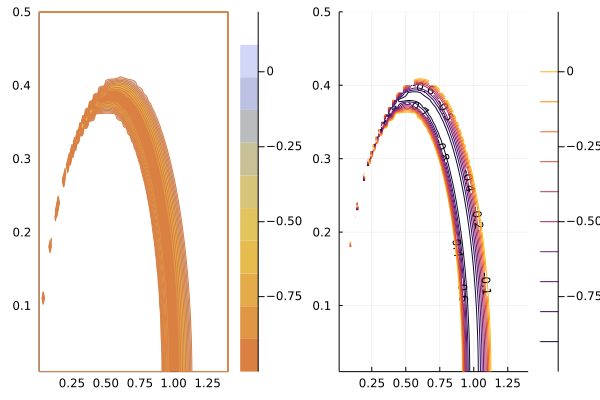

In [5]:

x = 0.01:0.01:1.40 # this is rho 
y = 0.01:0.01:0.50 # this is z
h(x, y) = begin
    r = sqrt(x^2+y^2) # x = x y = z
    if (p/x + a * x /r^3)^2/v2/γ^2 - 1. > 0.2 return 0.2
    else 
    return (p/x + a * x /r^3)^2/v2/γ^2 -1.
    end
    end
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(h, X, Y)
#levels = 50
levels = 0.0:-0.1:-1.
#levels = [0.,-0.01,-0.02]
p1 = contour(x, y, h, fill = true, levels = 10, c = cgrad(:beach))
#p1 = contour(x, y, h, fill = true, levels = 10, c = cgrad([:orange, :blue], [-0.1, -0.3, -1.]))
p2 = contour(x, y, Z, levels = levels, contour_labels = true)

#plot(p1)
plot(p1,p2)
#h(1,0) # this is the place where we give the initial data por position
#show(plot(p2))

The values for which $h^2$ is minimum corresponds to the line $r = \frac{a}{p}\sin(\theta)^2$. Perturbations around that line would move close to it. 
They would spiral more and more to the region of larger magnetic field until stopping and returning again, while they do it, they would also spiral around. 

We can see the outside (unbounded region) too. 

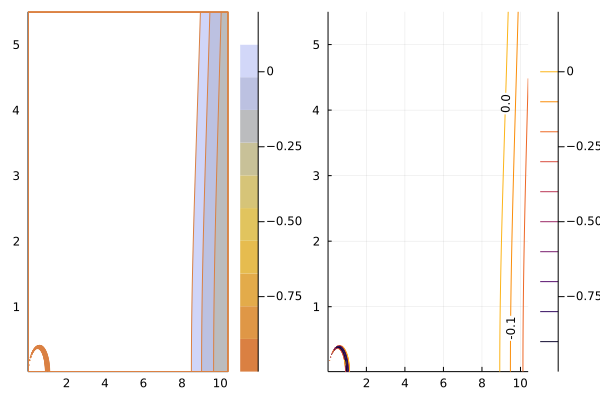

In [6]:
x = 0.01:0.01:10.40 # this is rho 
y = 0.01:0.01:5.50  # this is z
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(h, X, Y)
#levels = 50
levels = 0.0:-0.1:-1.
#levels = [0.,-0.01,-0.02]
p3 = contour(x, y, h, fill = true, levels = 10, c = cgrad(:beach))
#p1 = contour(x, y, h, fill = true, levels = 10, c = cgrad([:orange, :blue], [-0.1, -0.3, -1.]))
p4 = contour(x, y, Z, levels = levels, contour_labels = true)

plot(p3,p4)

In [7]:
function f(du,u,par,t)
    sint = sin(u[3])
    cost = cos(u[3])
    ϕ_t = (p/u[1]/sint + a/u[1]/u[1]*sint)/u[1]/sint/γ
    du[1] = u[2]
    du[2] = a/u[1]/u[1]*sint*sint*ϕ_t/γ
    du[3] = u[4]
    du[4] = (-2. * a/u[1]/u[1]/u[1]/γ + ϕ_t)*ϕ_t*sint*cost - 2. * u[2]*u[4]/u[1]
    du[5] = ϕ_t
end 

f (generic function with 1 method)

In [8]:
par = (a,p)
tspan = (0., T)

(0.0, 800)

In [9]:
prob = ODEProblem(f,u_0,tspan,p);

We use an algorithm that detects when the system becomes stiff and changes accordingly. 

In [11]:
tsidas_alg = AutoTsit5(Rodas5());
@time sol = solve(prob, tsidas_alg, reltol=reltol, abstol=abstol, maxiters=1e7);
#@time sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

  2.672062 seconds (51.96 M allocations: 959.077 MiB, 40.22% gc time)


retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 4rd order "free" stiffness-aware interpolation
t: 219243-element Vector{Float64}:
   0.0
   0.022485913443635437
   0.08740038471329958
   0.1766038572566376
   0.2822095593414385
   0.408363426880816
   0.5507888645815197
   0.7095919663529251
   0.8820705089799677
   1.0666205357282468
   ⋮
 799.7539868002534
 799.7860611698982
 799.8179377386
 799.8499505941955
 799.8826060427325
 799.9168944707963
 799.9552584721517
 799.9893320157884
 800.0
u: 219243-element Vector{Vector{Float64}}:
 [1.0, -0.0, 1.5707963267948966, 0.1, 0.0]
 [0.999999999784812, -3.8279268055625184e-8, 1.573044918138873, 0.09999999991392597, -3.8087506355575946e-8]
 [0.9999999508955562, -2.2470328664651255e-6, 1.579536364922915, 0.0999999803622198, -2.2358718471249663e-6]
 [0.9999991820807744, -1.8515412105844233e-5, 1.5884567009680444, 0.09999967310394493, -1.842603644859781e-5]
 [0.9999946757130156, -7.536083486331927e-5, 1.5

In [12]:
sphere_to_car(ρ,θ,ϕ) = (ρ*sin(θ)*sin(ϕ),ρ*sin(θ)*cos(ϕ),ρ*cos(θ)) # this is used to transform tuples in the plot recipy.
function s2c(ρ,θ,ϕ)
    return @. [ρ*sin(θ)*sin(ϕ); ρ*sin(θ)*cos(ϕ); ρ*cos(θ)]
end

s2c (generic function with 1 method)

In [14]:
using Pkg;Pkg.add("Plotly")
plotly()
#gr()
#esto no parece funcionar bien.

plot(sol,vars=(sphere_to_car,1,3,5),tspan=(0.0,T)
    , linewidth=1,title="Trayectories in a dipole field"
    , xlim = (-1.2, 1.2), ylim = (-1.2, 1.2), zlim = (-0.6, 0.6)
    , xaxis="x",yaxis="y",zaxis="z",label="electrons",show=true
    )

   Resolving package versions...


   Installed PlotlyBase ─────────────── v0.8.19
   Installed Pidfile ────────────────── v1.3.0
   Installed Polyester ──────────────── v0.6.15


   Installed URIParser ──────────────── v0.4.1
   Installed SLEEFPirates ───────────── v0.6.35
   Installed BinDeps ────────────────── v1.0.2


   Installed StaticArrays ───────────── v1.5.6


   Installed Tricks ─────────────────── v0.1.6
   Installed DiffEqBase ─────────────── v6.100.0


   Installed SciMLBase ──────────────── v1.53.2
   Installed BandedMatrices ─────────── v0.17.6


   Installed ArrayInterfaceCore ─────── v0.1.20
   Installed AssetRegistry ──────────── v0.1.0
   Installed WebIO ──────────────────── v0.8.18
   Installed Blink ──────────────────── v0.12.5
   Installed LinearSolve ────────────── v1.26.0
   Installed JumpProcesses ──────────── v9.2.0
   Installed Hiccup ─────────────────── v0.2.2
   Installed MbedTLS ────────────────── v1.1.5


   Installed Compat ─────────────────── v4.2.0
   Installed Lazy ───────────────────── v0.15.1


   Installed DiffRules ──────────────── v1.11.1
   Installed WebSockets ─────────────── v1.5.9


   Installed Kaleido_jll ────────────── v0.2.1+0
   Installed FunctionWrappersWrappers ─ v0.1.1


   Installed Parsers ────────────────── v2.4.0
   Installed Mustache ───────────────── v1.0.14
   Installed StochasticDiffEq ───────── v6.53.0
   Installed Sundials ───────────────── v4.10.1
   Installed PlotlyJS ───────────────── v0.18.8


   Installed LineSearches ───────────── v7.2.0


   Installed Plotly ─────────────────── v0.4.1
   Installed JSExpr ─────────────────── v0.5.4
   Installed FastLapackInterface ────── v1.2.6
   Installed Widgets ────────────────── v0.6.6
   Installed LoopVectorization ──────── v0.12.125
   Installed ArrayInterface ─────────── v6.0.23
   Installed VectorizationBase ──────── v0.21.47
   Installed FunctionalCollections ──── v0.5.0


   Installed Mux ────────────────────── v0.7.6
   Installed QuadGK ─────────────────── v2.5.0
   Installed FillArrays ─────────────── v0.13.3


   Installed RecursiveFactorization ─── v0.2.12
   Installed Observables ────────────── v0.5.1
   Installed Optim ──────────────────── v1.7.2
   Installed Distributions ──────────── v0.25.70


    Updating `~/.julia/environments/v1.8/Project.toml`
  [58dd65bb] + Plotly v0.4.1
    Updating `~/.julia/environments/v1.8/Manifest.toml`


  [4fba245c] ↑ ArrayInterface v6.0.22 ⇒ v6.0.23
  [30b0a656] ↑ ArrayInterfaceCore v0.1.17 ⇒ v0.1.20
  [bf4720bc] + AssetRegistry v0.1.0
  [aae01518] ↑ BandedMatrices v0.17.5 ⇒ v0.17.6
  [9e28174c] + BinDeps v1.0.2
  [ad839575] + Blink v0.12.5
  [944b1d66] - CodecZlib v0.7.0
  [34da2185] ↑ Compat v3.46.0 ⇒ v4.2.0
  [2b5f629d] ↑ DiffEqBase v6.97.1 ⇒ v6.100.0
  [b552c78f] ↑ DiffRules v1.11.0 ⇒ v1.11.1
  [31c24e10] ↑ Distributions v0.25.67 ⇒ v0.25.70
  [29a986be] ↑ FastLapackInterface v1.2.5 ⇒ v1.2.6
  [1a297f60] ↑ FillArrays v0.13.2 ⇒ v0.13.3
  [77dc65aa] ↑ FunctionWrappersWrappers v0.1.0 ⇒ v0.1.1
  [de31a74c] + FunctionalCollections v0.5.0
⌅ [cd3eb016] ↓ HTTP v1.2.1 ⇒ v0.9.17
  [9fb69e20] + Hiccup v0.2.2
  [97c1335a] + JSExpr v0.5.4
  [ccbc3e58] ↑ JumpProcesses v9.1.3 ⇒ v9.2.0
  [50d2b5c4] + Lazy v0.15.1
  [d3d80556] ↑ LineSearches v7.1.1 ⇒ v7.2.0
  [7ed4a6bd] ↑ LinearSolve v1.23.3 ⇒ v1.26.0
  [e6f89c97] - LoggingExtras v0.4.9
  [bdcacae8] ↑ LoopVectorization v0.12.123 ⇒ v0.12.125
  [739

    Building Blink ───→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/08d0b679fd7caa49e2bca9214b131289e19808c0/build.log`


    Building PlotlyJS → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/53d6325e14d3bdb85fd387a085075f36082f35a3/build.log`


Precompiling project...


  ✓ Tricks


  ✓ Compat
  ✓ Observables


  ✓ Pidfile


  ✓ ArrayInterfaceCore


  ✓ NaNMath


  ✓ Hiccup


  ✓ FillArrays


  ✓ FunctionWrappersWrappers


  ✓ FunctionalCollections


  ✓ Kaleido_jll


  ✓ MbedTLS


  ✓ Lazy
  ✓ FastLapackInterface


  ✓ Mustache


  ✓ AssetRegistry


  ✓ ArrayInterfaceGPUArrays


  ✓ ArrayInterfaceStaticArraysCore


  ✓ Widgets


  ✓ ChainRulesCore


  ✓ ExponentialUtilities
  ✓ ArrayInterface


  ✓ DataStructures


  ✓ ChangesOfVariables


  ✓ AbstractFFTs


  ✗ IJulia


  ✓ HTTP


  ✓ CloseOpenIntervals


  ✓ ArrayInterfaceOffsetArrays


  ✓ SortingAlgorithms


  ✓ ArrayLayouts


  ✓ QuadGK


  ✓ RecursiveArrayTools


  ✓ WebSockets


  ✓ StaticArrays


  ✓ LogExpFunctions


  ✓ GR


  ✓ WebIO


  ✓ FFTW


  ✓ DiffResults


  ✓ Mux


  ✓ BandedMatrices


  ✓ ArrayInterfaceStaticArrays


  ✓ SciMLBase


  ✓ ResettableStacks


  ✓ FiniteDiff


  ✓ ArnoldiMethod


  ✓ StatsBase


  ✓ JSExpr


  ✓ QuantumOpticsBase


  ✓ LayoutPointers


  ✓ SpecialFunctions


  ✓ StrideArraysCore


  ✓ Blink


  ✓ LevyArea


  ✓ DualNumbers


  ✓ GeometryBasics


  ✓ DiffRules


  ✓ Graphs


  ✓ HypergeometricFunctions


  ✓ Polyester


  ✓ ColorVectorSpace


  ✓ VertexSafeGraphs


  ✓ StatsFuns


  ✓ FastBroadcast


  ✓ ForwardDiff


  ✓ SparseDiffTools


  ✓ ColorSchemes


  ✓ NLSolversBase


  ✓ Distributions


  ✓ PlotlyBase


  ✓ VectorizationBase


  ✓ PlotUtils


  ✓ LineSearches


  ✓ RecipesPipeline


  ✓ SLEEFPirates


  ✓ NLsolve


  ✓ PlotlyJS


  ✓ PlotThemes


  ✓ Optim


  ✓ SIMDDualNumbers


  ✓ ReverseDiff


  ✓ Plotly


  ✓ PreallocationTools


  ✓ LoopVectorization


  ✓ Plots


  ✓ TriangularSolve


  ✓ RecursiveFactorization


  ✓ NonlinearSolve


  ✓ LinearSolve


  ✓ DiffEqBase


  ✓ DiffEqCallbacks


  ✓ DiffEqNoiseProcess


  ✓ JumpProcesses


  ✓ BoundaryValueDiffEq


  ✓ SteadyStateDiffEq


  ✓ Sundials


  ✓ OrdinaryDiffEq


  ✓ DelayDiffEq


  ✓ StochasticDiffEq


  ✓ QuantumOptics


  ✓ DifferentialEquations
  101 dependencies successfully precompiled in 680 seconds. 185 already precompiled.
  63 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package


In [15]:
N = 1000
dT = T/(N-1)
X = zeros(N,3)
ts = [dT*(i-1) for i in 1:N]
for i in 1:N
    X[i,:] = s2c(sol(ts[i],idxs=1),sol(ts[i],idxs=3),sol(ts[i],idxs=5))
end
plot(X[:,1], X[:,2], X[:,3])

UndefVarError: UndefVarError: sol not defined

In [16]:
#using Plots
gr()
plt = plot3d(
    1,
    xlim = (-1.5, 1.5),
    ylim = (-1.5, 1.5),
    zlim = (-0.6, 0.6),
    title = "Motion in a Magnetic Dipole",
    marker = 0.1, ms= 0.5,
)
anim = @animate for i in 1:N
    ts = dT*(i-1)
    X[i,:] = s2c(sol(ts,idxs=1),sol(ts,idxs=3),sol(ts,idxs=5))
    push!(plt, X[i,1], X[i,2], X[i,3])
    end every 1
gif(anim, "dipole_slow_fps20.gif", fps = 20)


UndefVarError: UndefVarError: gr not defined

La animación que sigue debería andar pero consume muchos recursos. Trate de no usarla...

In [17]:
#gr()
#animate(sol,"dipole.gif",vars=(sphere_to_car,1,3,5),tspan=(0.0,T/100),linewidth=1,title="Trayectories in a dipole field",
#     xlim = (-1.2, 1.2),ylim = (-1.2, 1.2),xaxis="x",yaxis="y",zaxis="z",label="electrons",every=4)

In [18]:
using GLMakie

ts = 0.0
N_int = 50
N_frames = 100
dT = T/(N_int*N_frames-1)

points = Observable(Point3f0[])
colors = Observable(Int[])

set_theme!(theme_black())

fig, ax, l = lines(points, color = colors,
    colormap = :inferno, transparency = true,
    axis = (; type = Axis3, protrusions = (0, 0, 0, 0),
        viewmode = :fit, limits = (-1.5, 1.5, -1.5, 1.5, -0.6, 0.6)))
    
record(fig, "electron.mp4", 1:N_frames) do frame
    for i in 1:N_int
        ts = dT*(i-1) + dT*N_int*(frame-1)
        pp = s2c(sol(ts,idxs=1),sol(ts,idxs=3),sol(ts,idxs=5))
        push!(points[], Point3f0(pp))
        push!(colors[], frame)
    end
    ax.azimuth[] = 1.7pi + 0.3 * sin(pi * frame / N_frames)
    notify.((points, colors))
    l.colorrange = (0, frame)
end

ArgumentError: ArgumentError: Package GLMakie not found in current path.
- Run `import Pkg; Pkg.add("GLMakie")` to install the GLMakie package.